In [124]:
#Import necessary libraries
import pandas as pd

In [125]:
#Load the dataset
df = pd.read_csv('flight.csv')

In [81]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [126]:
#drop least important features
df.drop(['Unnamed: 0', 'flight', 'duration'], axis = 1, inplace = True)

In [83]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [84]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

<AxesSubplot:xlabel='airline'>

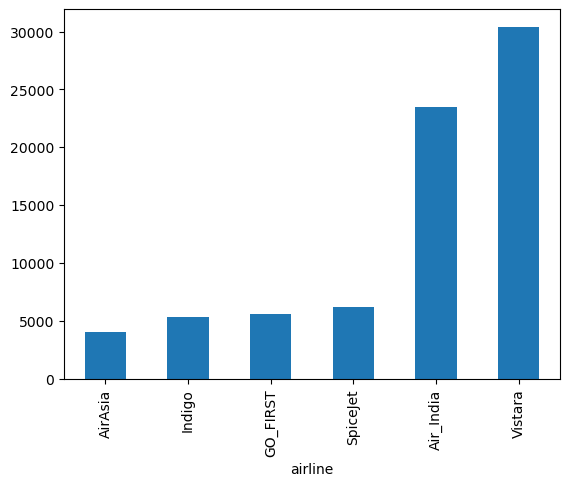

In [85]:
df.groupby('airline')['price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='airline'>

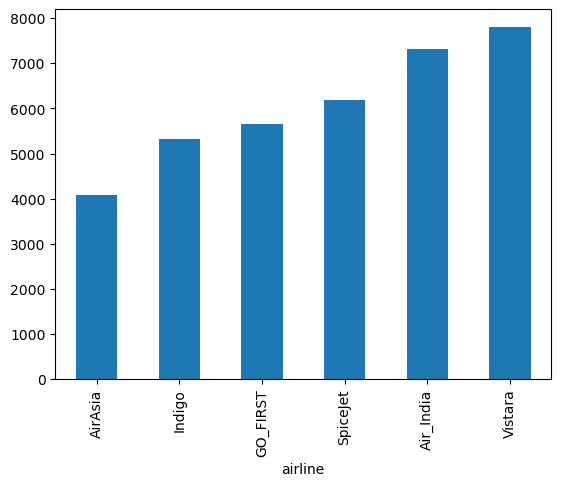

In [86]:
df[df['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values().plot(kind = 'bar')

In [87]:
df['airline'] = df['airline'].map({'AirAsia':0, 'Indigo':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5})

In [88]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


<AxesSubplot:xlabel='source_city'>

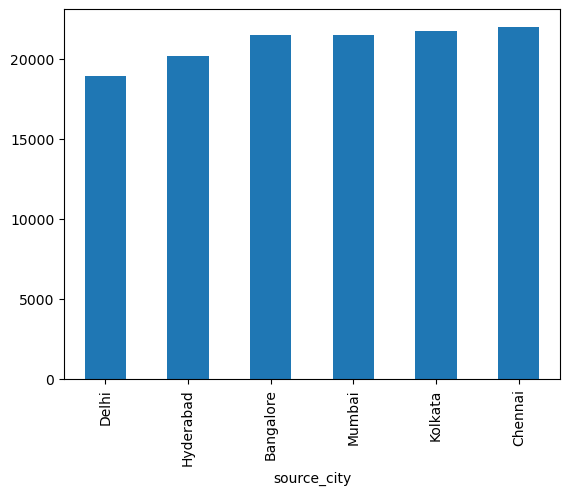

In [89]:
df.groupby('source_city')['price'].mean().sort_values().plot(kind = 'bar')

In [90]:
df['source_city'] = df['source_city'].map({'Delhi':0, 'Hyderabad':1, 'Bangalore':2, 'Mumbai':3, 'Kolkata':4, 'Chennai':5})

<AxesSubplot:xlabel='destination_city'>

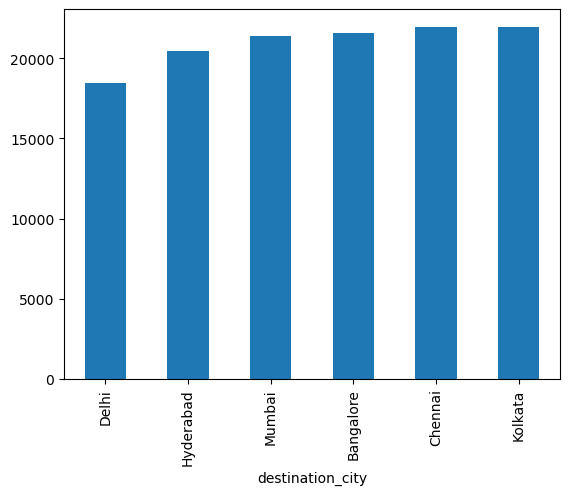

In [91]:
df.groupby('destination_city')['price'].mean().sort_values().plot(kind = 'bar')

In [92]:
df['destination_city'] = df['destination_city'].map({'Delhi':0, 'Hyderabad':1, 'Mumbai':2, 'Bangalore':3, 'Chennai':4, 'Kolkata':5})

In [93]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,Evening,zero,Night,2,Economy,1,5953
1,3,0,Early_Morning,zero,Morning,2,Economy,1,5953
2,0,0,Early_Morning,zero,Early_Morning,2,Economy,1,5956
3,5,0,Morning,zero,Afternoon,2,Economy,1,5955
4,5,0,Morning,zero,Morning,2,Economy,1,5955


In [94]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [95]:
df['departure_time'] = df['departure_time'].map({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5})

In [96]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,zero,Night,2,Economy,1,5953
1,3,0,0,zero,Morning,2,Economy,1,5953
2,0,0,0,zero,Early_Morning,2,Economy,1,5956
3,5,0,1,zero,Afternoon,2,Economy,1,5955
4,5,0,1,zero,Morning,2,Economy,1,5955


In [97]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [98]:
df['arrival_time'] = df['arrival_time'].map({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5})

In [99]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [100]:
df['stops'] = df['stops'].map({'zero':0, 'one':1, 'two_or_more':2})

In [101]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [102]:
df['class'] = df['class'].map({'Economy':0, 'Business':1})

In [103]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,4,2,0,1,5953
1,3,0,0,0,1,2,0,1,5953
2,0,0,0,0,0,2,0,1,5956
3,5,0,1,0,2,2,0,1,5955
4,5,0,1,0,1,2,0,1,5955


In [104]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left           0
price               0
dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [107]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
0,3,0,3,0,4,2,0,1
1,3,0,0,0,1,2,0,1
2,0,0,0,0,0,2,0,1
3,5,0,1,0,2,2,0,1
4,5,0,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...
300148,5,5,1,1,3,1,1,49
300149,5,5,2,1,4,1,1,49
300150,5,5,0,1,4,1,1,49
300151,5,5,0,1,3,1,1,49


In [108]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [109]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state = 0)

In [110]:
X_train.size

1920976

In [111]:
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [121]:
lr.score(X_test, y_test)

0.9051940666251451

In [116]:
from sklearn.metrics import mean_absolute_error

In [117]:
y_pred = lr.predict(X_test)

In [118]:
from sklearn.metrics import mean_absolute_error

In [120]:
mean_absolute_error(y_test, y_pred)

4485.403941607371

In [122]:
import pickle

In [123]:
pickle.dump(lr, open('Linear_Model.pkl','wb'))